In [5]:
import torch
from sklearn.datasets import make_blobs


num_classes=4
in_feature=2
RND_SEED=42




In [6]:


X_blob,y_blob=make_blobs(
    n_samples=1000,
    n_features=in_feature,
    centers=num_classes,
    random_state=RND_SEED
)

In [7]:
X_blob,y_blob

(array([[-8.55503989,  7.06461794],
        [-6.13753182, -6.58081701],
        [-6.32130028, -6.8041042 ],
        ...,
        [ 3.69047995,  4.60555175],
        [-7.48913939, -7.0670809 ],
        [-9.40049578,  7.11430104]]),
 array([3, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 3, 0, 2, 2, 2, 0, 0, 0, 1, 1, 3,
        3, 3, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 0, 3, 2, 1, 3, 3, 1, 2, 1, 3,
        1, 3, 0, 1, 3, 1, 2, 0, 1, 3, 0, 3, 0, 0, 0, 2, 2, 0, 2, 3, 1, 0,
        2, 2, 1, 0, 3, 0, 1, 2, 1, 3, 1, 0, 1, 0, 2, 0, 0, 0, 1, 3, 2, 2,
        0, 0, 0, 0, 1, 1, 3, 1, 3, 0, 1, 2, 1, 3, 3, 0, 3, 1, 1, 0, 2, 0,
        3, 2, 1, 1, 1, 1, 2, 3, 2, 1, 0, 2, 3, 1, 3, 2, 1, 3, 2, 1, 0, 2,
        1, 3, 1, 3, 0, 2, 1, 1, 0, 0, 3, 3, 3, 1, 1, 0, 0, 0, 0, 3, 2, 2,
        0, 1, 0, 1, 1, 3, 2, 0, 1, 2, 0, 0, 1, 2, 3, 2, 1, 0, 0, 1, 0, 3,
        2, 3, 2, 3, 1, 1, 0, 2, 0, 2, 1, 3, 0, 2, 1, 0, 1, 1, 0, 3, 2, 2,
        2, 3, 0, 2, 1, 0, 1, 1, 2, 0, 1, 2, 2, 3, 2, 2, 1, 0, 2, 0, 3, 1,
        3, 3, 2, 0, 3, 0, 1, 

In [8]:
#lets visualize in the form of table
import pandas as pd
data=pd.DataFrame({
    "x1":X_blob[:,0],
    "x2":X_blob[:,1],
    "y":y_blob
})

In [9]:
data

,x1,x2,y
0,-8.555040,7.064618,3
1,-6.137532,-6.580817,2
2,-6.321300,-6.804104,2
3,4.180518,1.123325,1
4,4.380287,0.470027,1
...,...,...,...
995,-4.818124,-5.671743,2
996,-1.885078,9.642632,0
997,3.690480,4.605552,1
998,-7.489139,-7.067081,2


In [10]:
type(X_blob),type(y_blob), X_blob.dtype,y_blob.dtype

(numpy.ndarray, numpy.ndarray, dtype('float64'), dtype('int64'))

In [13]:
#converting them into tensor
X_tensor=torch.from_numpy(X_blob).type(torch.float)
type(X_tensor),X_tensor.dtype

(torch.Tensor, torch.float32)

In [15]:
y_tensor=torch.from_numpy(y_blob).type(torch.float)
type(y_tensor),y_tensor.dtype

(torch.Tensor, torch.float32)

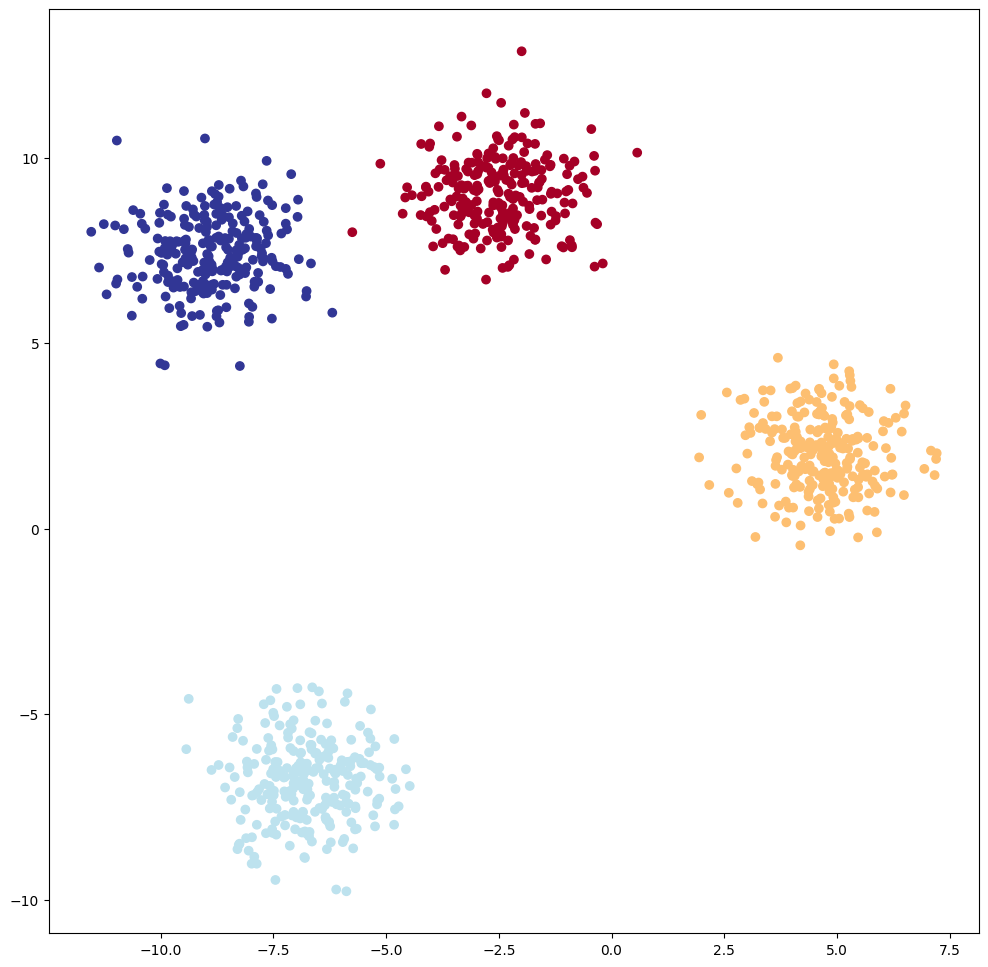

In [18]:
# now first lets visualize using matplotlib

import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.scatter(x=X_tensor[:,0],
            y=X_tensor[:,1],
            c=y_tensor,
            cmap=plt.cm.RdYlBu)

In [24]:
#checking device for availability

device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [26]:
#splitting dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_tensor,y_tensor,test_size=0.3,random_state=RND_SEED)

In [25]:
#creating a model
from torch import nn

class blob_v1(nn.Module):
  def __init__(self,in_feature,out_feature,hidden_units=8):
    super().__init__()
    # self.layer1=nn.Linear(in_features=in_feature,out_features=hidden_units)
    # self.layer2=nn.Linear(in_features=hidden_units, out_features=hidden_units)
    # self.layer3=nn.Linear(in_features=hidden_units,out_features=out_feature)
    # self.relu=nn.ReLU()
    self.layer=nn.Sequential(nn.Linear(in_features=in_feature,out_features=hidden_units),
                             nn.Linear(in_features=hidden_units, out_features=hidden_units)
                             ,nn.Linear(in_features=hidden_units,out_features=out_feature))
  def forward(self,x):
    return self.layer(x)


# num_classes=4
# in_feature=2
# RND_SEED=42
model_0=blob_v1(
    in_feature=in_feature,
    out_feature=num_classes,
    hidden_units=8
)


In [33]:
#making predictions

model_0.eval()
with torch.inference_mode():
  y_logits=model_0(X_test)

y_logits,y_test

(tensor([[-0.8591,  0.1416,  0.7368, -0.2593],
         [ 0.9737,  0.4599,  0.6353, -1.4219],
         [ 0.5439, -0.6226, -1.2146,  0.9348],
         ...,
         [-0.9686,  0.0074,  0.5286,  0.0484],
         [ 0.4848, -0.5518, -1.0607,  0.8047],
         [-0.9078,  0.0099,  0.5104,  0.0265]]),
 tensor([1., 3., 2., 1., 0., 3., 2., 0., 2., 0., 0., 1., 0., 0., 0., 3., 3., 2.,
         3., 3., 3., 0., 1., 2., 2., 2., 3., 0., 1., 0., 3., 1., 1., 3., 1., 2.,
         1., 3., 0., 2., 0., 3., 3., 2., 0., 3., 1., 1., 0., 3., 1., 0., 1., 1.,
         3., 2., 1., 1., 3., 2., 2., 0., 3., 2., 2., 0., 0., 3., 3., 0., 0., 3.,
         3., 3., 2., 3., 3., 3., 3., 1., 0., 2., 3., 2., 3., 3., 2., 3., 3., 2.,
         3., 3., 1., 3., 3., 3., 1., 0., 3., 2., 0., 0., 3., 0., 2., 3., 1., 0.,
         3., 2., 1., 1., 0., 2., 2., 3., 0., 0., 1., 2., 2., 3., 0., 1., 2., 0.,
         0., 0., 2., 3., 1., 2., 3., 2., 0., 3., 0., 0., 1., 1., 1., 0., 2., 2.,
         2., 2., 0., 3., 3., 2., 2., 1., 3., 2., 0., 0

In [35]:
y_pred=round(torch.softmax(y_logits)).squeeze()

TypeError: softmax() received an invalid combination of arguments - got (Tensor), but expected one of:
 * (Tensor input, int dim, torch.dtype dtype, *, Tensor out)
 * (Tensor input, name dim, *, torch.dtype dtype)


In [28]:
torch.eq(y_pred,y_test)

RuntimeError: The size of tensor a (4) must match the size of tensor b (300) at non-singleton dimension 1